# 04_기술통계

자료를 그래프나 숫자 등으로 요약하는 통계적 행위 및 관련 방법

데이터를 요약하고 시각화해서 잘 설명하는 것이 중점을 두며 데이터에 대해서 쉽게 설명하기 위해서 `시각화`를 많이 활용한다.

기술 통계에서 기본적으로 사용하는 시각화 자료들을 박스플롯(상자그림), 도수분포표, 히스토그램이 있으며, 이를 기반으로 
사실을 객과적으로 확인하는 것을 중점으로 한다.

## #01. 기술통계 절차

1. 데이터의 전체 크기와 형태
    - 행과 열의 수를 확인한다.
    - 10만건의 데이터 전체를 출력하는 것은 매우 부담이 큰 처리이므로 상위 n건, 하위 n건의 일부만을 확인한다.
1. 집단의 특성을 잘 나타내는 요약 통계량을 확인한다.
    - 평균, 중앙값, 표준편차, 범위(최대값~최소값), 사분위수 등을 확인한다.
    - 요약통계량을 상자그림으로 시각화하여 확인한다.
1. 전체 데이터의 데이터 분포를 확인한다.
    - 구간별 자료의 개수를 나타내는 표 (=도수분포표)를 산정한다.
    - 도수 분포표를 그래프로 표현한 히스토그램을 확인한다.

## =============================================

## #02. 필요한 패키지 및 샘플 데이터 준비
### 1) 패키지 참조하기

In [1]:
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot
from pandas import ExcelFile

### 2) 샘플 데이터 가져오기

기술통계 수치값, 상자그림 확인을 위해 학생 10,000명의 자료를 가상으로 표현한 샘플 데이터

#### - CSV 파일을 DataFrame 에 받기

In [2]:
df1 = read_csv('grade.csv', encoding='euc-kr')
df1

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


#### - Excel 파일을 DataFrame 에 받기

In [3]:
xls = ExcelFile('grade.xlsx')
df2 = xls.parse(xls.sheet_names[0])
df2

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


### 3) 성적표 데이터 전처리

In [4]:
이름 = list(df1['이름'])

indexDic = {}
for i, v in enumerate(이름) :
    indexDic[i] = v

df1.rename(index=indexDic, inplace=True)
df1.drop(['이름', '성별', '학년'], axis=1, inplace=True)
df1

,국어,영어,수학,과학
철수,98,NaN,88.0,64.0
영희,88,90.0,62.0,72.0
민수,92,70.0,NaN,NaN
수현,63,60.0,31.0,70.0
호영,120,50.0,NaN,88.0


### => 그래프 축에 이름과 과목이 나오게하기 위해서

## ===================================================

## #03. 데이터의 전체 크기와 형태 확인

### 1) 데이터프레임의 전체 크기 조회
조회 결과는 튜플 타입으로 리턴된다.

In [5]:
rows, cols = df1.shape
print("행 크기 : " , rows)
print("열 크기 : " , cols)

행 크기 :  5
열 크기 :  4


### 2) 데이터의 일부만 확인하기

#### 앞부분 5건만 확인 : head() , 만약에 숫자를 넣으면 숫자만큼

In [6]:
df1.head(3)

,국어,영어,수학,과학
철수,98,NaN,88.0,64.0
영희,88,90.0,62.0,72.0
민수,92,70.0,NaN,NaN


#### 뒤부분 5건만 확인 : tail() , 만약에 숫자를 넣으면 숫자만큼

In [7]:
df1.tail(3)

,국어,영어,수학,과학
민수,92,70.0,NaN,NaN
수현,63,60.0,31.0,70.0
호영,120,50.0,NaN,88.0


## ====================================================

## #04. 요약 통계량 얻기

### 1) 요약 통계량을 이해하기 위한 통계학 개념

#### `평균값`

모든 값을 더한 후 개수의 나눈 값.

`1,2,3,4,5,100`의 평균은  `(1+2+3+4+5+100)/6` 이므로 `19.17`이다.

평균은 특정값이 다른 값들의 범위와 차이카 큰 경우 신뢰도가 떨어진다.

> 위의 데이터에서 100에 해당하는 값은 다른 값들에 비해 극단적으로 높다.  이러한 형태의 값을 **극단치** 라고 한다.

#### `중앙값`

모든 값을 순서대로 정렬한 후 가운데 위치의 값

평균의 신뢰도가 현저히 낮을 경우 데이터의 분포를 확인하기 위해 사용한다.

##### 데이터의 수가 홀수개인 경우

모든 값을 순서대로 정렬한 후 가운데 위치의 값.

1, 2, 3, 4, 5 의 중앙값은 `3`이다.

##### 데이터의 수가 짝수개인 경우

모든 값을 순서대로 정렬한 후 가운데 두 값의 평균.

1, 2, 3, 4, 5, 6 의 중앙값은 `(3+4)/2`이므로 `3.5`이다.

### 2) 사분위 수

데이터의 표본을 4개의 동일 부분으로 나눈 값.

사분위수는 데이터의 관측치가 아닌 계산된 값이다.

사분위수를 사용하여 데이터의 집합의 범위와 중심위치를 신속하게 평가 할 수 있다.

이는 데이터를 이해하는데 중요한 첫 번째 단계이다.

| 용어 | 설명 |
|------|------|
| 1사분위 수 : 데이터의 하위 25%가 이 값보다 작거나 같음. |
| 2사분위 수 : 중위수  데이터의 하위 50%가 이 값보다 작거나 같음.(=중앙값) |
| 3사분위 수 : 데이터의 하위 75%가 이 값보다 작거나 같음. |

반대로 말하면 데이터의 상위 25%는 3사분위 수 보다 크다.

예를 들어, 데이터가 `7,9,16,36,39,45,45,46,48,51`인 경우

> Q1 = 14.25 <br>
> Q2 = 42 <br>
> Q3 = 46.50 <br>
> 사분위간 범위 = 14.25 ~ 46.50 또는 32.25

사분위수를 정학하게 계산하려면 종종  두 관측치 사이를 보간해야 한다.

중위수와 사분위간 범위는 극단치의 영향을 받지 않기 때문에 평균 및 표준 편차보다 치우침이 많은 데이터의 중심 위치와 
범위의 더 나은 측도가 될 수 있다.


### 3) 전체 컬럼에 대한 일괄 확인

요약 통계량을 표현하는 데이터프레임이 변환된다

- count : 결측치(NaN)을 제외한 유효 데이터의 수
- mean : 평균
- std : 표준편차
- min : 최소값
- 25% : 1사분위 수 (하위 25% 위치의 데이터)
- 50% : 2사분위 수, 중앙값 (하위 50% 위치의 데이터)
- 75% : 3사분위 수 (하위 75% 위치의 데이터)
- max : 최대값

> 1사분위 ~ 3사분위 수까지를 **4분위수**라고 묶어서 표현한다.

## =====================================================

### 전체확인

In [8]:
des = df1.describe()
des

,국어,영어,수학,과학
count,5.000000,4.000000,3.000000,4.000000
mean,92.200000,67.500000,60.333333,73.500000
std,20.474374,17.078251,28.536526,10.246951
min,63.000000,50.000000,31.000000,64.000000
25%,88.000000,57.500000,46.500000,68.500000
50%,92.000000,65.000000,62.000000,71.000000
75%,98.000000,75.000000,75.000000,76.000000
max,120.000000,90.000000,88.000000,88.000000


### 특정 컬럼에 대한 확인

In [9]:
df1['국어'].describe()

count      5.000000
mean      92.200000
std       20.474374
min       63.000000
25%       88.000000
50%       92.000000
75%       98.000000
max      120.000000
Name: 국어, dtype: float64

### 4) 기술 통계값을 개별적으로 얻기

In [10]:
# 개수
df1.count()

국어    5
영어    4
수학    3
과학    4
dtype: int64

In [11]:
# 산술평균
df1.mean()

국어    92.200000
영어    67.500000
수학    60.333333
과학    73.500000
dtype: float64

In [12]:
# 표준편차
df1.std()

국어    20.474374
영어    17.078251
수학    28.536526
과학    10.246951
dtype: float64

In [13]:
# 최솟값
df1.min()

국어    63.0
영어    50.0
수학    31.0
과학    64.0
dtype: float64

In [14]:
# 최댓값
df1.max()

국어    120.0
영어     90.0
수학     88.0
과학     88.0
dtype: float64

In [15]:
# 1사분위수 (하위 25%)
df1.quantile(q=0.25)

국어    88.0
영어    57.5
수학    46.5
과학    68.5
Name: 0.25, dtype: float64

In [16]:
# 2사분위수, 중앙값 (50%)
df1.quantile(q=0.5)

국어    92.0
영어    65.0
수학    62.0
과학    71.0
Name: 0.5, dtype: float64

In [17]:
# 또 다른 중앙값 구하기
df1.median()

국어    92.0
영어    65.0
수학    62.0
과학    71.0
dtype: float64

In [18]:
# 3사분위수 (하위 75% or 상위 25%)
df1.quantile(q=0.75)

국어    98.0
영어    75.0
수학    75.0
과학    76.0
Name: 0.75, dtype: float64

In [19]:
# 상위 10% 에 해당하는 과목별 점수
df1.quantile(q=0.9)

국어    111.2
영어     84.0
수학     82.8
과학     83.2
Name: 0.9, dtype: float64

## =========================================================
#### 4) 상자그림

데이터의 요약 정보를 시각화 해 놓은 그래프로 데이터의 범위, 사분위 수등을 확인 할 수 있는 시각화 자료이다.

> 내부적으로 matplotlib패키지의 pyplot 객체를 사용한다.

![boxplot](boxplot.png)

#### pyplot 객체 기본 환경 설정

In [20]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic' # 사용할 폰트이름 지정(맑은 고딕)
pyplot.rcParams["font.size"] = 14                # 글자 크기
pyplot.rcParams["figure.figsize"] = (12,6)       # 그래프의 가로, 세로 크기 (inch단위)

### 전체 데이터 프레임의 상자 그림

<Axes: >

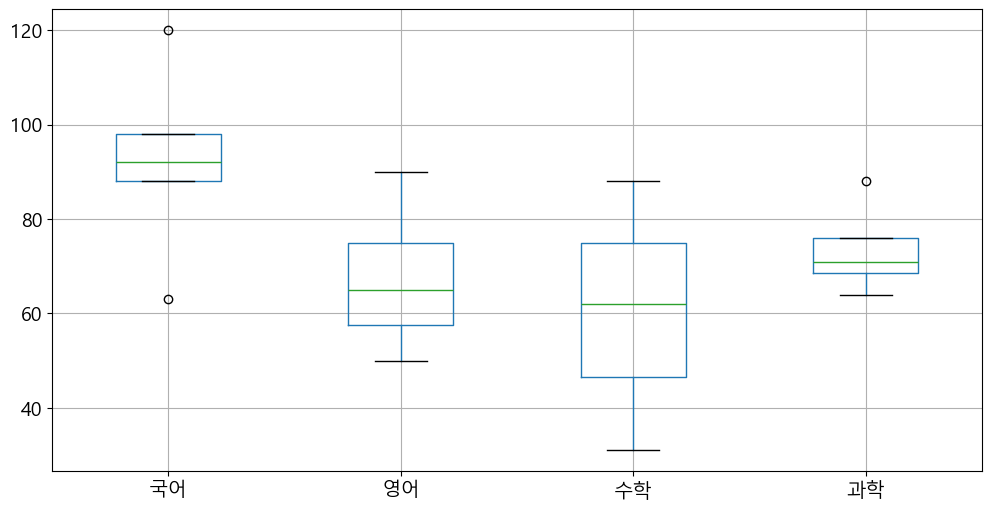

In [21]:
# 상자 그림 생성
df1.boxplot()

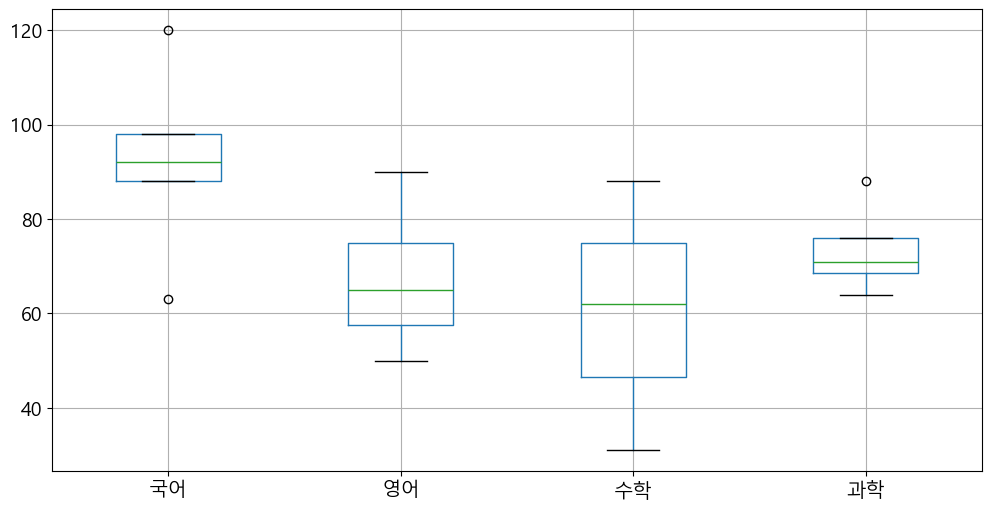

In [22]:
# 생성된 그래프 화면 표시
df1.boxplot()
pyplot.show()

### 특정 컬럼에 대한 상자그림 표시

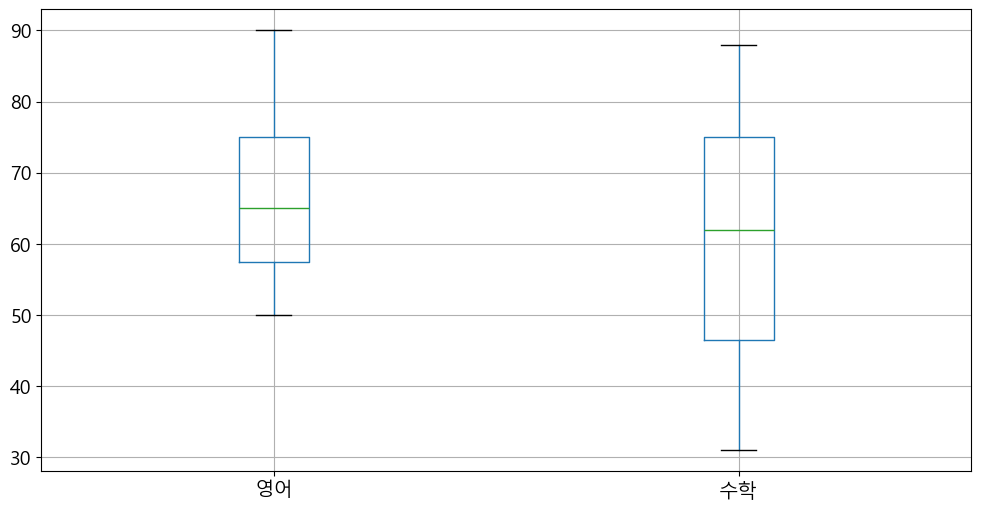

In [23]:
df1.boxplot(['영어', '수학'])
pyplot.show()

## =====================================================

## #05.  히스토그램과 도수분포표

### 1) 히스토그램

자료가 가질 수 있는 범위를 몇 개의 **구간**으로 나누고 각 구간에 해당 한느 값의 숫자 혹은 상대적 빈도를 표현하는 그래프

#### a) 히스토그램 작성 과정
1. 자료의 갯수와 구간(최대값, 최소값)을 확인한다.
1. 자료를 몇 개의 구간으로 나눌지 분석가의 주관에 따라 결정한다.
    - 구간은 자료의 개수나 분포에 따라 달라져야 한다.
    - 각 구간별로 5개 이상의 값이 들어가도록 하는 것이 좋다.
    - 너무 많은 구간을 나누지 않도록 해야 한다. (일반적으로 5~15 사이의 값)
1. Pyplot의 `hist()` 함수를 사용하여 히스토그램을 생성한다.
    >  n, bins, patches = pyplot.hist(값, 구간_수) 
 
    - n은 각 구간에 포함된 값의 갯수 혹은 빈도를 표현하는 리스트
    - bins는 각 구간별 경계값 리스트
    - patches는 각 구간을 그리는 matplot 객체 리스트 (사용안함))함)

### 2) 샘플 데이터 가져오기

In [24]:
df = read_csv('grade10000.csv', encoding='euc-kr')
df

,이름,국어,영어,수학,과학
0,학생1,98.0,NaN,88.0,64.0
1,학생2,88.0,90.0,62.0,72.0
2,학생3,92.0,70.0,NaN,NaN
3,학생4,63.0,60.0,31.0,70.0
4,학생5,100.0,50.0,NaN,88.0
...,...,...,...,...,...
9995,학생9996,63.0,60.0,55.0,70.0
9996,학생9997,21.0,50.0,55.0,88.0
9997,학생9998,98.0,90.0,88.0,64.0
9998,학생9999,88.0,90.0,62.0,72.0


## ======================================================

### 3) 전처리하기

In [25]:
# 전처리 공식 => 습관화 하기

lis = list(df['이름'])

dic = {}
for i, v in enumerate(lis) :
    dic[i] = v
    
df.rename(index=dic, inplace=True)

df.drop(['이름'], axis=1, inplace=True)

df

,국어,영어,수학,과학
학생1,98.0,NaN,88.0,64.0
학생2,88.0,90.0,62.0,72.0
학생3,92.0,70.0,NaN,NaN
학생4,63.0,60.0,31.0,70.0
학생5,100.0,50.0,NaN,88.0
...,...,...,...,...
학생9996,63.0,60.0,55.0,70.0
학생9997,21.0,50.0,55.0,88.0
학생9998,98.0,90.0,88.0,64.0
학생9999,88.0,90.0,62.0,72.0


In [26]:
# 자료의 개수를 구하자 
# df.count() => NaN 값이 있어서 사용하지말자
len(df)

10000

In [27]:
# 최대값
df.max()

국어    100.0
영어     98.0
수학     99.0
과학     99.0
dtype: float64

In [28]:
# 최솟값
df.min()

국어    3.0
영어    1.0
수학    0.0
과학    0.0
dtype: float64

## =========================================================

In [29]:
# 몇 개의 구간으로 나눌지 분석가의 주관에 따라 결정
step = 5

## 히스토그램 그래프에 대한 한글폰트, 글자크기, 그래픽크기 설정

In [30]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic' # 사용할 폰트이름 지정(맑은 고딕)
pyplot.rcParams["font.size"] = 14                # 글자 크기
pyplot.rcParams["figure.figsize"] = (12,6)       # 그래프의 가로, 세로 크기 (inch단위)

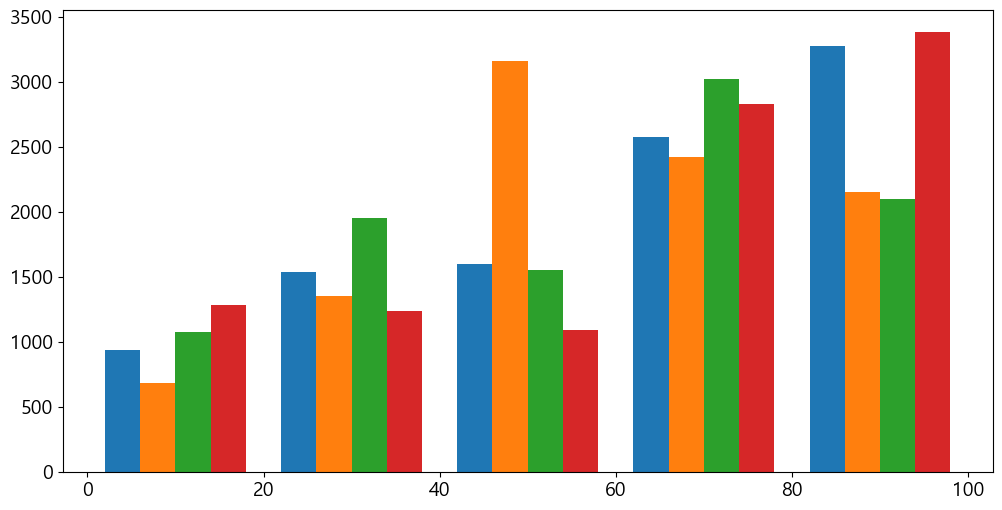

In [31]:
pyplot.hist(df, bins=step)
pyplot.show()

### step 이 커질수록 세분화 된다.

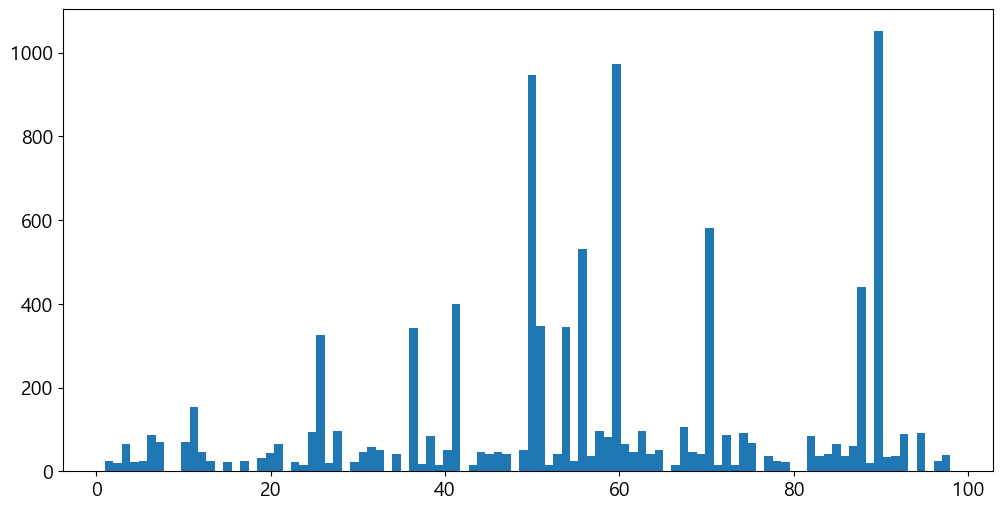

In [32]:
step = 100
pyplot.hist(df['영어'], bins=step)
pyplot.show()

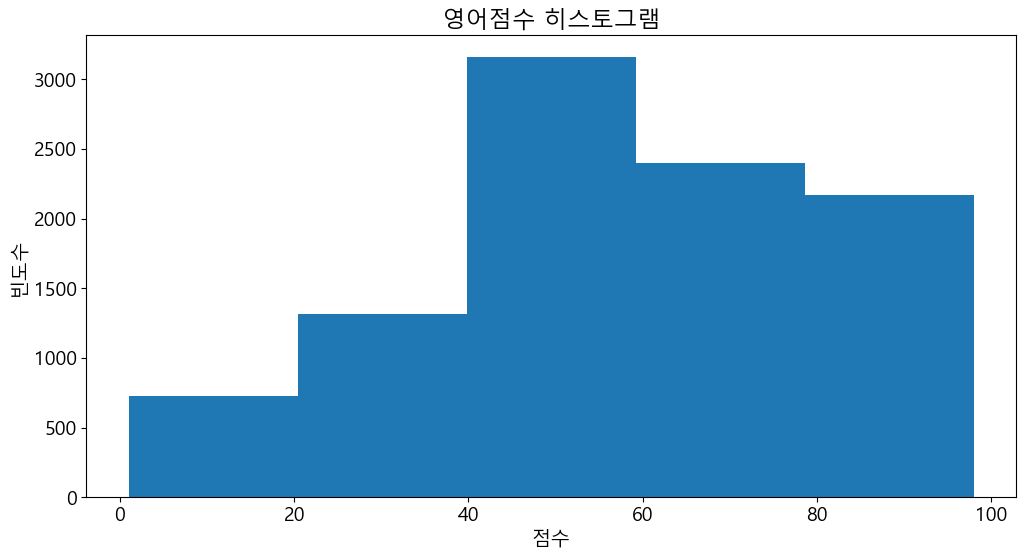

In [33]:
step = 5
n, bins, patches = pyplot.hist(df['영어'], bins=step)
pyplot.xlabel('점수')
pyplot.ylabel('빈도수')
pyplot.title('영어점수 히스토그램')
pyplot.show()

In [34]:
print('데이터의 개수 : ', n)
print('데이터의 경계값 : ', bins)
print('patches : ', patches)

데이터의 개수 :  [ 727. 1314. 3158. 2400. 2171.]
데이터의 경계값 :  [ 1.  20.4 39.8 59.2 78.6 98. ]
patches :  <BarContainer object of 5 artists>


## ===========================================================

### 4) 리턴값 확인

#### - 데이터의 구간 정보를 담고 있는 리스트 ( bins )
- 1 이상 20.4 미만
- 20.4 이상 39.8 미만
- 39.8 이상 59.2 미만
- 59.2 이상 78.6 미만
- 78.6 이상 98 `이하` (마지막 구간은 포함됨)

In [35]:
bins

array([ 1. , 20.4, 39.8, 59.2, 78.6, 98. ])

#### - 각 구간별 데이터의 개수 ( n )

In [36]:
n

array([ 727., 1314., 3158., 2400., 2171.])

## ===============================================

### 5) 히스토그램 보정하기

#### 구간 정보의 소수점 반올림 처리

In [37]:
# bins 리스트의 원소들을 소수점 둘째 자리에서 반올림 하자
# 쥬피터에서는 bins 값을 소수점 첫째 자리까지만 표시한다. (실제로 콘솔에서 보면 긴값으로 구성되어있다.)
for i, v in enumerate(bins) :
    bins[i] = round(v, 1)

bins

array([ 1. , 20.4, 39.8, 59.2, 78.6, 98. ])

## pyplot 을 활용한 히스토그램 구성

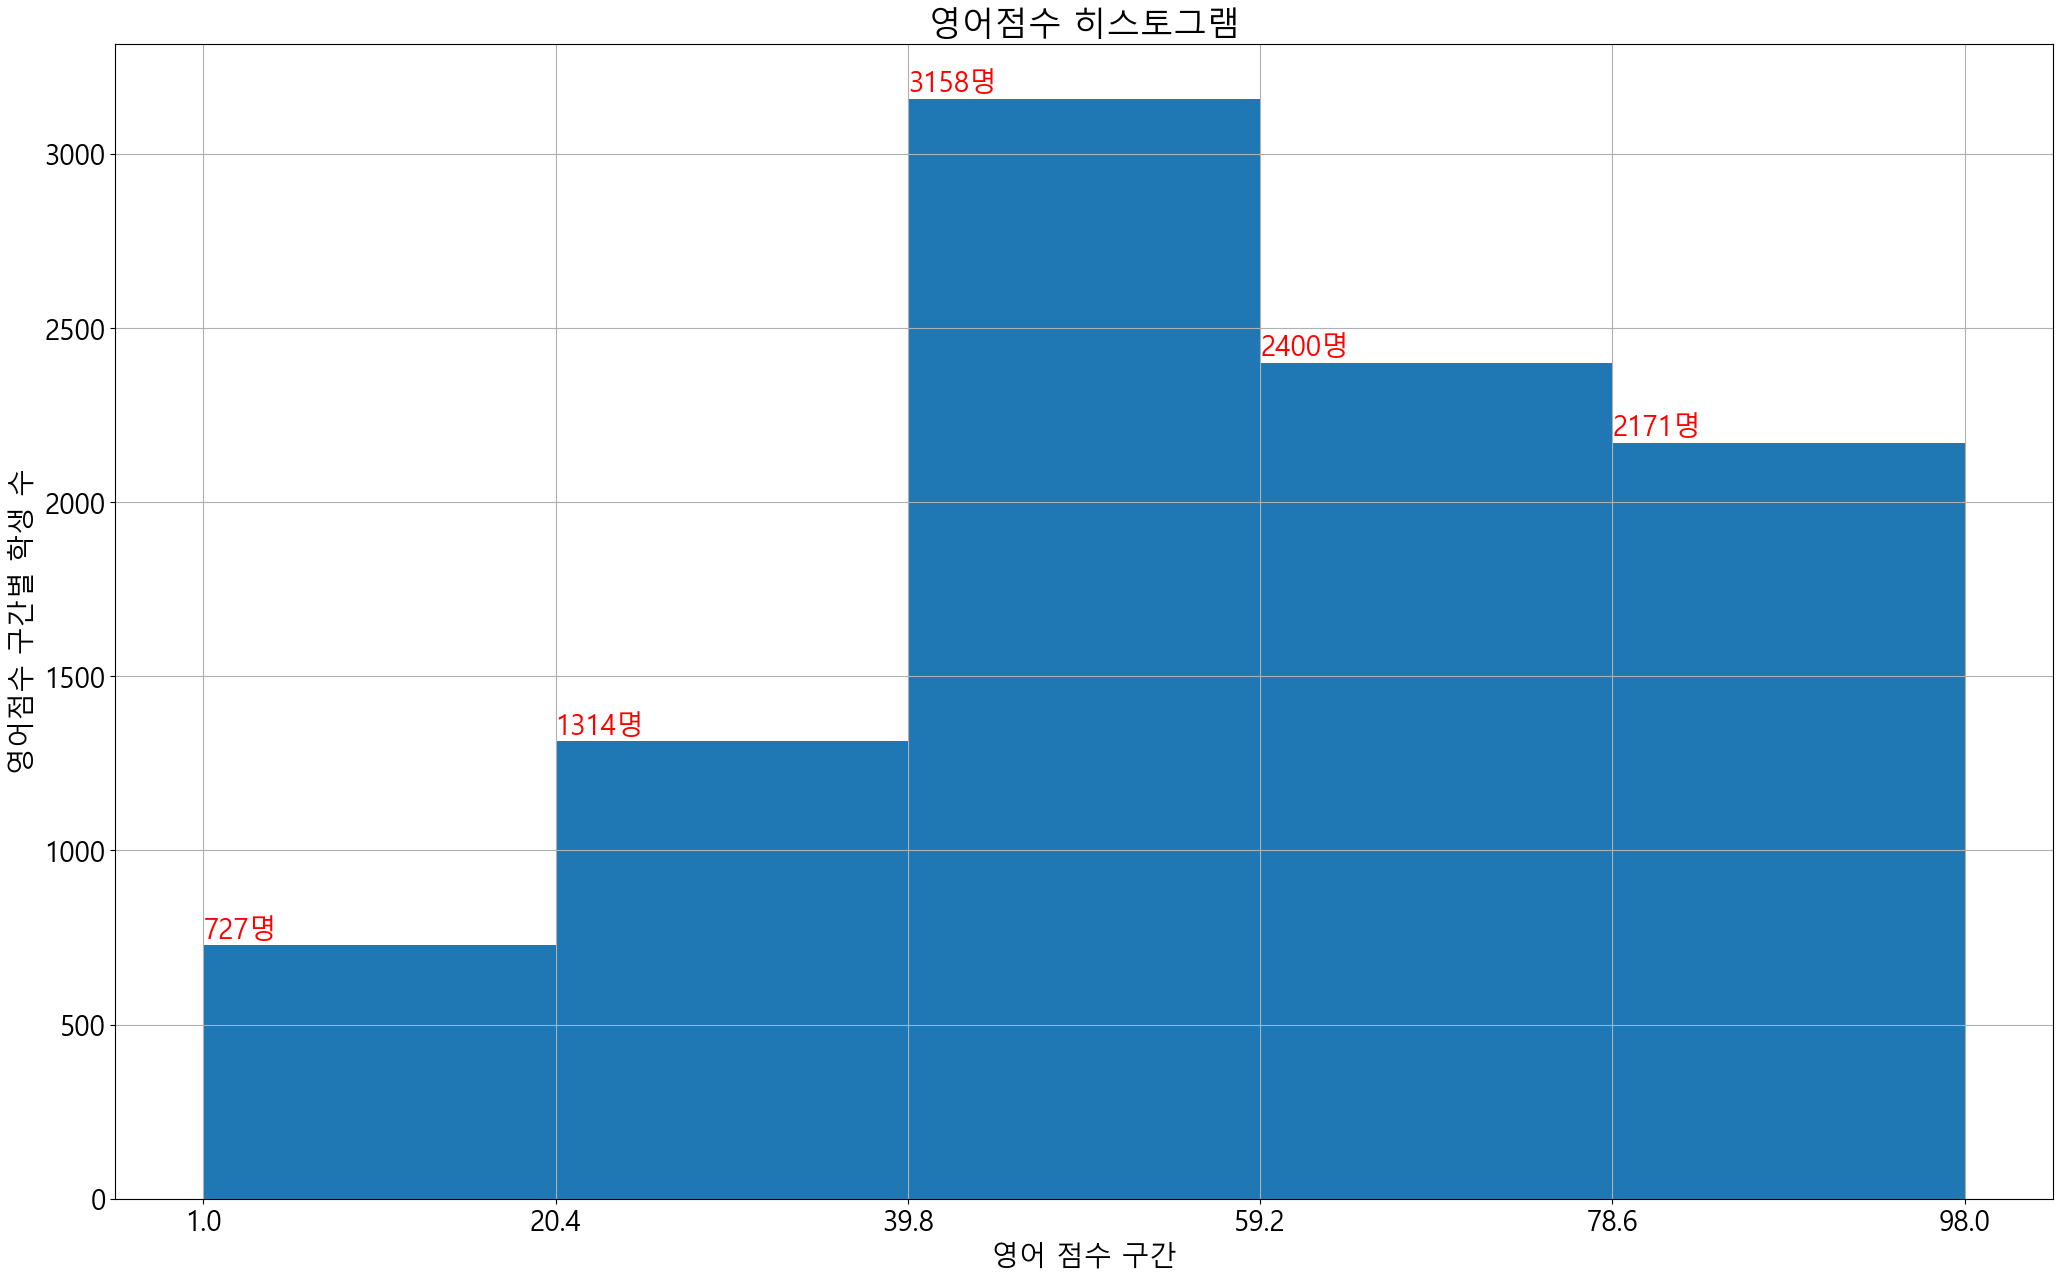

In [64]:
pyplot.rcParams["font.family"] = 'Malgun Gothic' # 사용할 폰트이름 지정(맑은 고딕)
pyplot.rcParams["font.size"] = 20                # 글자 크기
pyplot.rcParams["figure.figsize"] = (25,15)       # 그래프의 가로, 세로 크기 (inch단위)

pyplot.hist(df['영어'], bins=step)
pyplot.grid() # 격자
pyplot.xlabel('영어 점수 구간')
pyplot.ylabel('영어점수 구간별 학생 수')
pyplot.title('영어점수 히스토그램')

# x축 좌표에 다른 내용을 출력
pyplot.xticks(bins, bins)

# 상자 위에 텍스트 출력
for i, v in enumerate(n) :
    txt = "%d명" %v
    # x, y, 내용, 글자크기, 색상, 가로정렬, 세로정렬
    pyplot.text(bins[i], v, txt, fontsize=20, color='red', 
                horizontalalignment='left', verticalalignment='bottom')
    
pyplot.show()

## ==================================================

### 6) 도수분포표 만들기

`히스토리그램을 생성`하는 과정에서 `리턴되는 값들`이 `도수분포표`를 구성하는 정보에 해당한다.

Python에서 도수분포표를 한번에 생성하는 기능은 제공하지 않기 때문에 필요하다면 
표를 생성하기 위한 로직을 `직접 구현` 해야 한다.

In [66]:
idx = []
for i in range(0, len(bins)-1) :
    k = "%.1f ~ %.1f" %(bins[i], bins[i+1])
    idx.append(k)

idx

['1.0 ~ 20.4', '20.4 ~ 39.8', '39.8 ~ 59.2', '59.2 ~ 78.6', '78.6 ~ 98.0']

In [67]:
df = DataFrame( n , index=idx , columns=['빈도'] )
df

,빈도
1.0 ~ 20.4,727.0
20.4 ~ 39.8,1314.0
39.8 ~ 59.2,3158.0
59.2 ~ 78.6,2400.0
78.6 ~ 98.0,2171.0


## =======================================================

## 산점도

### 두 변수 간의 관계를 시각적으로 표현하는데 사용되는 그래프

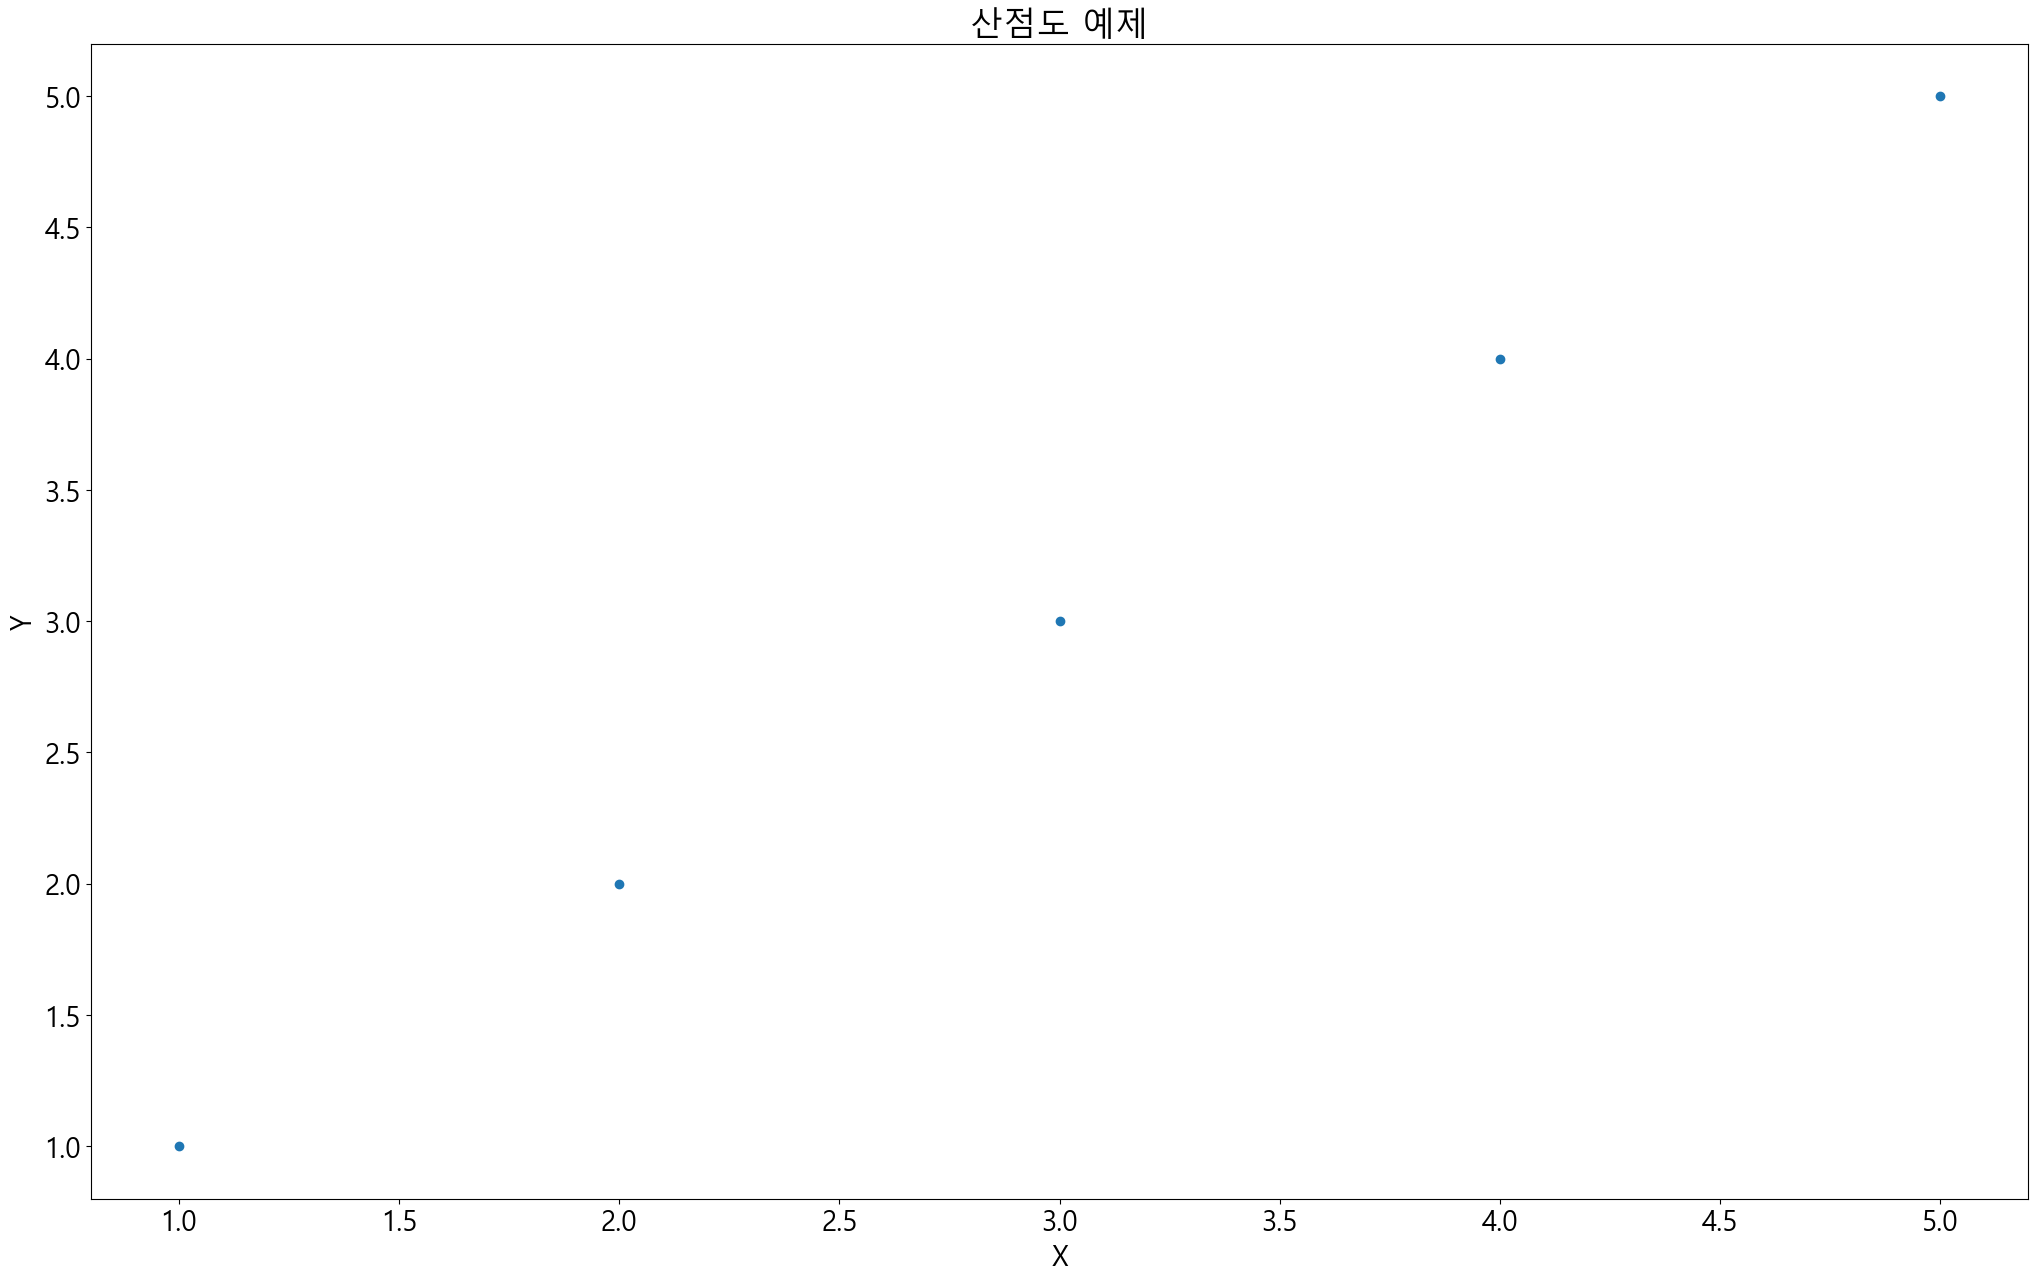

In [70]:
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]

pyplot.scatter(x,y)
pyplot.title('산점도 예제')
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.show()